# Project: Titanic - Machine Learning from Disaster

# 1. Introduction
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.  

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.  

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# 2. Loading the Data


In [54]:
# import linbrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
train_df = pd.read_csv("C:/TDAK/titanic/train.csv", index_col='PassengerId')
test_df = pd.read_csv("C:/TDAK/titanic/test.csv", index_col='PassengerId')

In [56]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

**Note:**
* `Sibsp`: # of sibling / spouses abroad the Titanic
* `Parch`: # of parent / children abroad the Titanic
* `Ticket`: Ticket Number
* `Cabin`: Cabin Number

In [58]:
#preview data
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


__Feature Classification: Categorical vs Numerical__

* Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch
* Numerical: Age (Continuous), Fare (discrete)
* Mix type of data: Ticket, Cabin
* Blank or Null: Cabin > Age > Embarket
* Various Data type: string, int, float

In [61]:
train_df['Survived'] = train_df['Survived'].astype('category')
feature_categorical = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
def convert_cat(df, categorical):
    for i in categorical:
        df[i] = df[i].astype('category')
convert_cat (train_df, feature_categorical)
convert_cat (test_df, feature_categorical)

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


Distribution of Numerical feature values across the sample

In [63]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Distribution of categorical feature

In [64]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysis (EDA)

**Correlating Categorical Feature**
* category: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch  

**Target Value: Survived**

In [65]:
train_df.Survived.value_counts().to_frame()

,count
Survived,
0,549
1,342


In [66]:
train_df.Survived.value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


#### Sex

In [67]:
train_df.Sex.value_counts(normalize = True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


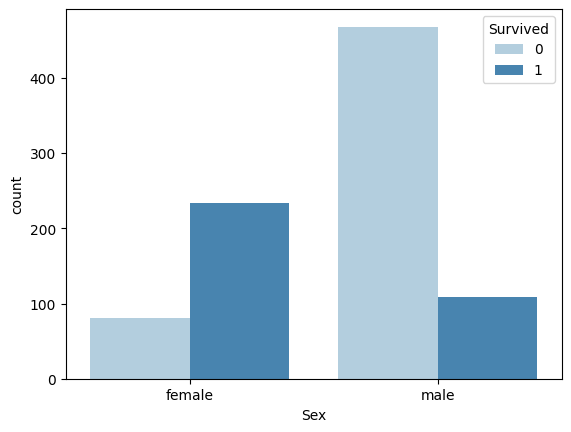

In [68]:
sns.countplot(data = train_df, x = 'Sex', palette = 'Blues', hue = 'Survived');

- Remaining Categorical Feature Columns

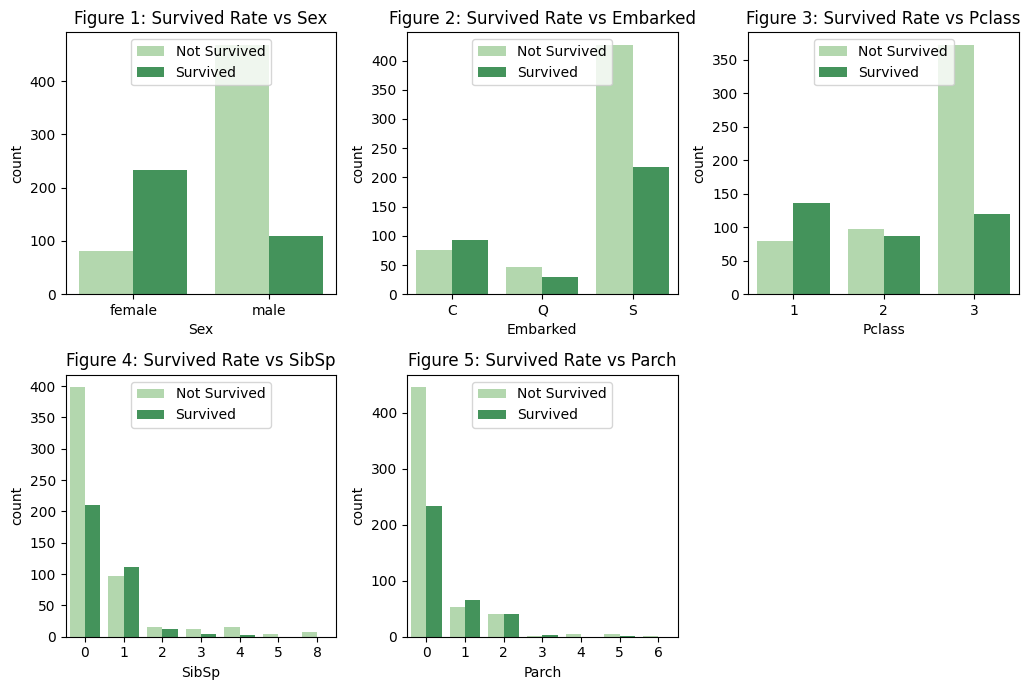

In [69]:
n_rows = 2
n_cols = 3
# feature_categorical = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5,n_rows*3.5))
for r in range (0,n_rows):
    for c in range (0, n_cols):
        i = r*n_cols + c #index to loop through list category
        if i < len(feature_categorical):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = feature_categorical[i], hue = 'Survived', palette='Greens', ax=ax_i)
            ax_i.set_title(f'Figure {i+1}: Survived Rate vs {feature_categorical[i]}')
            ax_i.legend(title = '', loc='upper center', labels=['Not Survived','Survived'])

plt.tight_layout() #để titlt không bị đè lên
ax.flat[-1].set_visible(False) #bỏ cái plot cuối (remove the last subplot)
plt.show()

__Observation:__  
Survival Rate:  
Fig 1: Female survival rate > male  
Fig 2: Most People embarked on Southampton, and also had the highest people not survived  
Fig 3: 1st class higher survival rate  
Fig 4: People going with 0 SibSp are mostly not survived. the number of passenger with 1-2 family members has a better chance of survival  
Fig 5: People going with 0 Parch are mostly not survived

__EDA for Numerical Feature__
* numerical Feature: (Continuous) Age, Fare

__Age__

<Axes: xlabel='Age', ylabel='Count'>

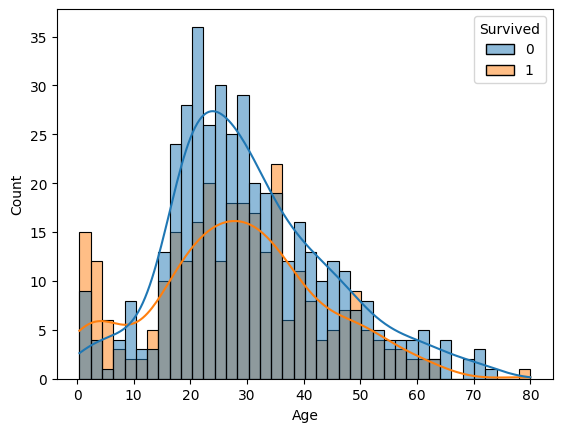

In [70]:
sns.histplot(data=train_df, x = 'Age', bins = 40, kde = True, hue = "Survived")

* Majority passengers were from 18-40 ages
* Children had more chance to survive than other ages

__Fare__

In [71]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

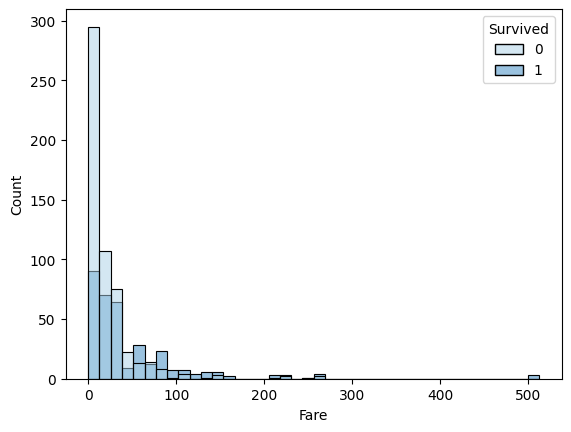

In [72]:
sns.histplot(data=train_df, x='Fare', bins=40, palette='Blues', hue=train_df["Survived"])

In [73]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [74]:
# To name for 0-25% quartile, 25-50, 50-75, 75-100
pd.qcut(train_df['Fare'], 4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

<Axes: xlabel='Fare', ylabel='count'>

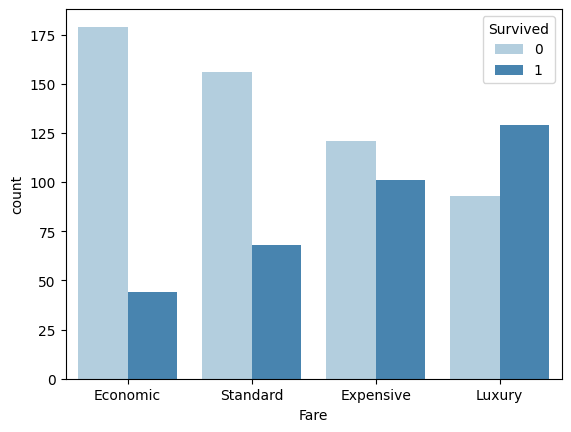

In [75]:
fare_category = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_category)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette='Blues')

* Distribution of Fare  
Fare does not follow a normal distribution and has a huge spike at the price range [0-100$]  
The distrbution is skewed to the left with 75% of the fare paid under $31 and a max paid fare of $512
* Quartile plot  
passengers with luxury & expensive fare will have more chance cho survive

# 4. Feature Engineering & Data Wrangling

## 4.1 Feature Engineering

__Name__
- Regular Expression

In [76]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [77]:
import re
def extract_title (name): #lấy các ký tự 'Mr, Miss, Rev'
    p = re.compile(r', ([\w\s]+)\.')
    if p.search(name) is None: #tìm những tên nào mà trả về None khi search p trong name
        print (name) 
    return p.search(name).groups(2)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title (name))


In [78]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [79]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title (name))
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

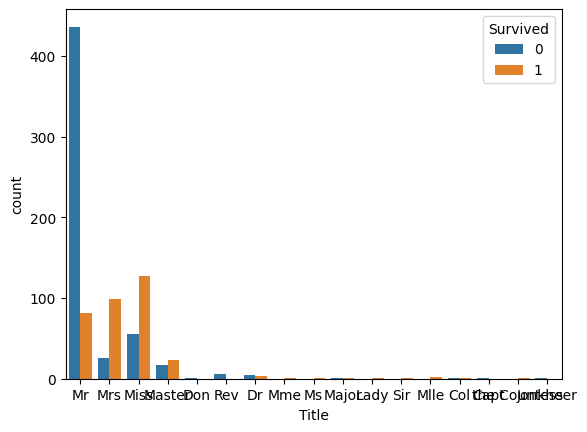

In [80]:
sns.countplot(data=train_df, x = train_df['Title'], hue=train_df['Survived'])

nhóm những title có ít value counts

In [81]:
def group_title(title):
    if title in ['Mr', 'Miss', 'Mrs', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))


In [82]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

In [83]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

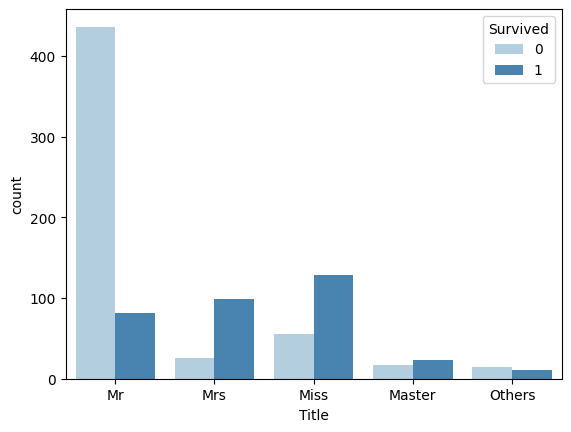

In [84]:
sns.countplot(data=train_df, x='Title', hue='Survived', palette='Blues')

__Family__
- SibSp, Parch

In [85]:
train_df['Family_Size']=train_df['SibSp'].astype(int) + train_df['Parch'].astype(int) + 1 #+1 bởi vì chỉ có 1 người đi
test_df['Family_Size']=test_df['SibSp'].astype(int) + test_df['Parch'].astype(int) + 1

In [86]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4


In [87]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medeum','Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medeum','Large'])

[0,1): solo (1 người)  
[1,4): small (2,3,4 người)  
[4,6): medium (4,5 người)  
[4,20): large (>= 4 người)  


<Axes: xlabel='Family_Cat', ylabel='count'>

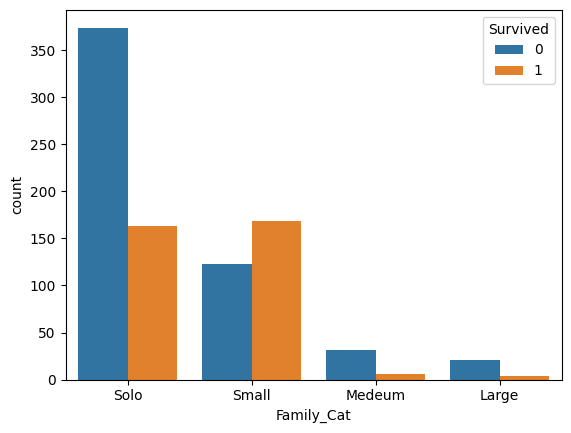

In [88]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived')

## 4.2 Data Wrangling

In [89]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,1,Solo
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,Solo
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,Small


In [90]:
num_features = ['Age', 'Fare']
cat_features= ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [91]:
def display_missing (df, feature_cols):
    n_row = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print (f'Col {col} has {missing_count} missing values')
            print (f'Col {col} has {missing_count*100/n_row : .2f} % missing values')
display_missing (train_df, feature_cols)   
display_missing (test_df, feature_cols)   

Col Age has 177 missing values
Col Age has  19.87 % missing values
Col Embarked has 2 missing values
Col Embarked has  0.22 % missing values
Col Age has 86 missing values
Col Age has  20.57 % missing values
Col Fare has 1 missing values
Col Fare has  0.24 % missing values


FILL MISSING VALUES

**Age**
- Filling missing value with `median` of whole dataset

In [92]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass'])['Age'].median()
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [93]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_Cat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,1,Solo
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,Solo
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,Small


In [96]:
# Filling the missing value in Age with median of Sex and Pclass groups
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
train_df.reset_index(drop=True, inplace=True)

test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df.reset_index(drop=True, inplace=True)


TypeError: incompatible index of inserted column with frame index

In [95]:
display_missing (train_df, feature_cols)   
display_missing (test_df, feature_cols)   

Col Age has 177 missing values
Col Age has  19.87 % missing values
Col Embarked has 2 missing values
Col Embarked has  0.22 % missing values
Col Age has 86 missing values
Col Age has  20.57 % missing values
Col Fare has 1 missing values
Col Fare has  0.24 % missing values


In [ ]:
x = train_df[feature_cols]
y = train_df['Survived']
x_test = test_df[feature_cols]

PREPROCESS PIPELINE

In [ ]:
from sklearn.pipeline import Pipeline # Với pipeline, các bước xử lý dữ liệu và mô hình hóa dữ liệu được sắp xếp theo một thứ tự cụ thể và tự động được áp dụng lần lượt cho từng tập dữ liệu. công cụ giúp  cho việc 
from sklearn.preprocessing import OneHotEncoder, StandardScaler #Chuẩn hóa dữ liệu, đối với num thì scale về phân phối chuẩn [0,1] đối với cat thì biến chữ thành số 
from sklearn.impute import SimpleImputer #điền missing value
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'median')),
    ('Scale', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
x = preprocessor.fit_transform(x)

In [ ]:
x_test = preprocessor.transform(x_test)

# 5'. Model Training

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import LinearSVC, SVC
# from sklearn.model_selection import train_test_split #thư viện chia file train thành 2 phân train và valid để so sánh kết quả train

# x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)
# model= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# # model = SVC(random_state=1)
# model.fit(x_train, y_train)
# predictions = model.predict(x_valid)
# print (predictions)

In [ ]:
# y_valid.values

In [ ]:
# model.score(x_valid, y_valid)

# 5. Model_Training 

In [ ]:
from sklearn.model_selection import train_test_split #thư viện chia file train thành 2 phân train và valid để so sánh kết quả train
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)


In [ ]:
x_train.shape, x_valid.shape, x_test.shape

((712, 19), (179, 19), (418, 19))

In [ ]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
# sklearn model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(x_valid, y_valid)

0.8324022346368715

In [ ]:
y_pred = log_reg.predict(x_valid)

In [ ]:
precision_score(y_valid, y_pred), recall_score(y_valid, y_pred)

(0.828125, 0.7361111111111112)

In [ ]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.83      0.74      0.78        72

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



__Polynomial Features__

- y = a*x1 + b*x2 + bias -> y = a*x1^2 + b*x2^2 +c*x1*x2 + bias

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_feature_x_train = poly.fit_transform(x_train)
poly_feature_x_valid = poly.transform(x_valid)

In [ ]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_feature_x_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
poly_log_reg.score(poly_feature_x_valid, y_valid)

0.8100558659217877

__DecisionTreeClassifier__

In [ ]:
decesion_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)
decesion_tree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [ ]:
decesion_tree.score(x_valid, y_valid)

0.8212290502793296

## 5.1 Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [ ]:
lr_scores = cross_val_score(log_reg_cv, x, y,scoring='accuracy', cv=5)
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [ ]:
dt_scores = cross_val_score(dt_cv, x, y,scoring='accuracy', cv=5)
dt_scores.mean(), dt_scores.std()

(0.8137216747222397, 0.014388618786467437)

## 5.2 Baseline Model Comparison

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(random_state=seed, max_iter=1200000),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(max_depth=10,random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(eval_metric='logloss', random_state=seed)

]


SO SÁNH TỪNG PHƯƠNG PHÁP 

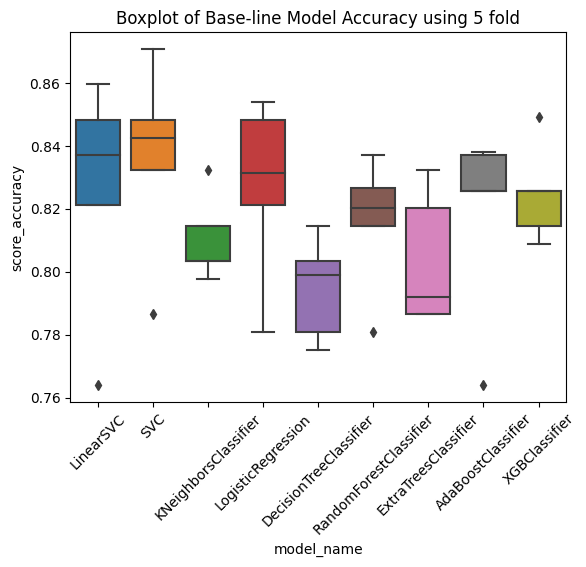

,Mean,Standard deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
XGBClassifier,0.824889,0.015407
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.815925,0.021290
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.803559,0.021337
DecisionTreeClassifier,0.794608,0.016252


In [ ]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_result (models, x, y, metrics, cv, plot_result=False):
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries=[]
    for model in models:
        model_name = model.__class__.__name__
        scores_list = cross_val_score(model,x,y,scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores_list):
            entries.append((model_name,fold_idx, score))

    df = pd.DataFrame(data=entries, columns=['model_name', 'fold_id','score_accuracy'])
    if plot_result:
        sns.boxplot(data=df, x='model_name', y='score_accuracy')
        plt.xticks(rotation=45)
        plt.title('Boxplot of Base-line Model Accuracy using 5 fold')
        plt.show()
    # Summary result 
    mean = df.groupby('model_name')['score_accuracy'].mean()
    std = df.groupby('model_name')['score_accuracy'].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ['Mean', 'Standard deviation']

    # Sort by accuracy
    baseline_result.sort_values(by=['Mean'], ascending=False, inplace=True)

    return baseline_result

generate_baseline_result (models,x, y,'accuracy',5, plot_result=True)


In [ ]:
model=RandomForestClassifier(max_depth=10,random_state=seed)
model.fit(x_train, y_train)
predictions = model.predict(x_valid)
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [ ]:
y_valid.values

[0, 0, 1, 1, 1, ..., 0, 0, 0, 1, 0]
Length: 179
Categories (2, int64): [0, 1]

In [ ]:
model.score(x_valid, y_valid)

0.8324022346368715